In [2]:
# Importing necessary libraries
import pandas as pd              # Pandas for data manipulation and analysis
from scipy.stats import shapiro, levene  # Shapiro and Levene tests from SciPy for statistical testing
# Importing visualization libraries
import matplotlib.pyplot as plt  # Matplotlib for creating plots
import seaborn as sns            # Seaborn for enhanced data visualization
# Importing necessary function from scipy.stats
from scipy.stats import kruskal  # Kruskal-Wallis test is imported from scipy.stats

# Load the dataset
file_path = 'C:\\Users\\sulaiman\\Desktop\\work\\mario.csv'  # Define the file path where the dataset is located
data = pd.read_csv(file_path)    # Read the CSV file into a Pandas DataFrame

# Display the first few rows of the dataframe
data.head()  # The .head() method displays the first 5 rows of the DataFrame, giving an overview of the data structure

,team_id,phase,group,round,totalingred
0,21301,1,newhire,1,19
1,21301,1,newhire,2,23
2,21301,1,newhire,3,23
3,21301,1,newhire,4,25
4,21301,1,newhire,5,24


In [3]:
# Descriptive statistics for the 'totalingred' column, broken down by 'group' and 'phase'
descriptive_stats = data.groupby(['group', 'phase'])['totalingred'].describe()
#descriptive_stats

| Group   | Phase | Count | Mean  | Std Dev | Min | 25%  | Median | 75%  | Max |
|---------|-------|-------|-------|---------|-----|------|--------|------|-----|
| AI      | 1     | 120   | 23.13 | 4.56    | 9   | 21.0 | 23.0   | 26.0 | 33  |
| AI      | 2     | 120   | 26.23 | 3.38    | 17  | 24.0 | 26.5   | 29.0 | 36  |
| Control | 1     | 120   | 22.44 | 4.25    | 11  | 20.0 | 23.0   | 25.0 | 31  |
| Control | 2     | 120   | 26.75 | 3.26    | 18  | 25.0 | 27.0   | 28.25| 34  |
| Newhire | 1     | 90    | 23.44 | 4.42    | 13  | 21.25| 24.0   | 27.0 | 33  |
| Newhire | 2     | 90    | 27.13 | 3.89    | 18  | 25.0 | 27.0   | 30.0 | 36  |


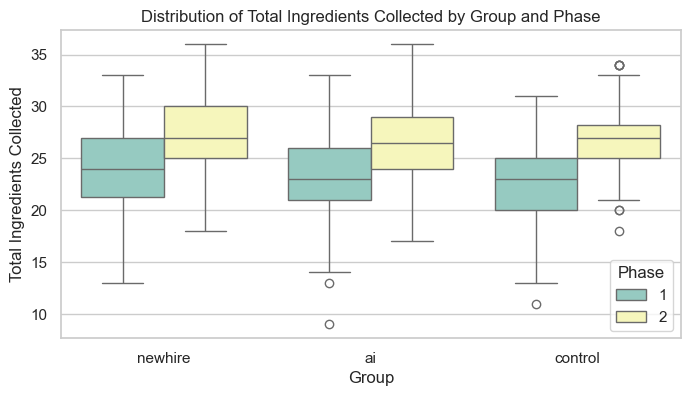

In [4]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")  # 'whitegrid' style adds a grid for better readability

# Preparing to create a boxplot
plt.figure(figsize=(8, 4))  # Initialize a new figure with a specified size (8 inches by 4 inches)

# Creating a boxplot
sns.boxplot(x="group", y="totalingred", hue="phase", data=data, palette="Set3")
# sns.boxplot creates a boxplot
# x="group": Defines 'group' column as x-axis
# y="totalingred": Defines 'totalingred' column as y-axis
# hue="phase": Distinguishes data points by 'phase' column with different colors
# data=data: Specifies the source DataFrame
# palette="Set3": Uses the 'Set3' color palette for distinct hues

# Adding plot title and labels
plt.title("Distribution of Total Ingredients Collected by Group and Phase")  # Title of the plot
plt.xlabel("Group")  # Label for the x-axis
plt.ylabel("Total Ingredients Collected")  # Label for the y-axis
plt.legend(title="Phase")  # Adds a legend with the title "Phase"

# Displaying the plot
plt.show()  # Renders the plot on the screen


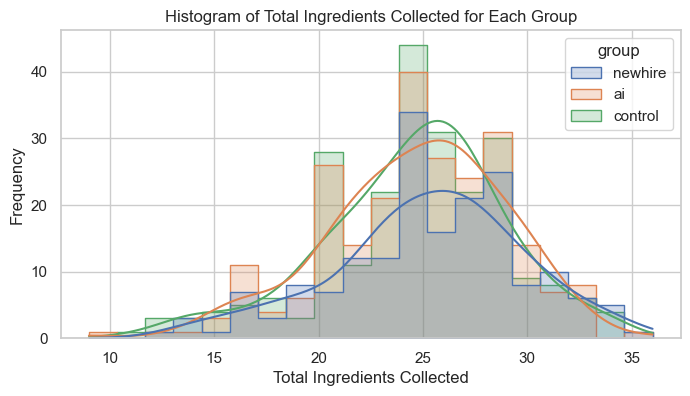

In [5]:
# Creating a histogram for the distribution of total ingredients collected for each group
plt.figure(figsize=(8, 4))  # Initialize a new figure with a specified size (8 inches by 4 inches)

# Creating a histogram using Seaborn
sns.histplot(data, x="totalingred", hue="group", element="step", kde=True)
# sns.histplot creates a histogram
# data: Specifies the source DataFrame
# x="totalingred": Defines 'totalingred' column as x-axis (data to be binned and counted)
# hue="group": Distinguishes data points by 'group' column with different colors
# element="step": Uses step-like bars for the histogram (rather than the default solid bars)
# kde=True: Adds a Kernel Density Estimate (KDE) plot on top of the histogram for smooth distribution representation

# Adding plot title and labels
plt.title("Histogram of Total Ingredients Collected for Each Group")  # Title of the plot
plt.xlabel("Total Ingredients Collected")  # Label for the x-axis
plt.ylabel("Frequency")  # Label for the y-axis

# Displaying the plot
plt.show()  # Renders the plot on the screen

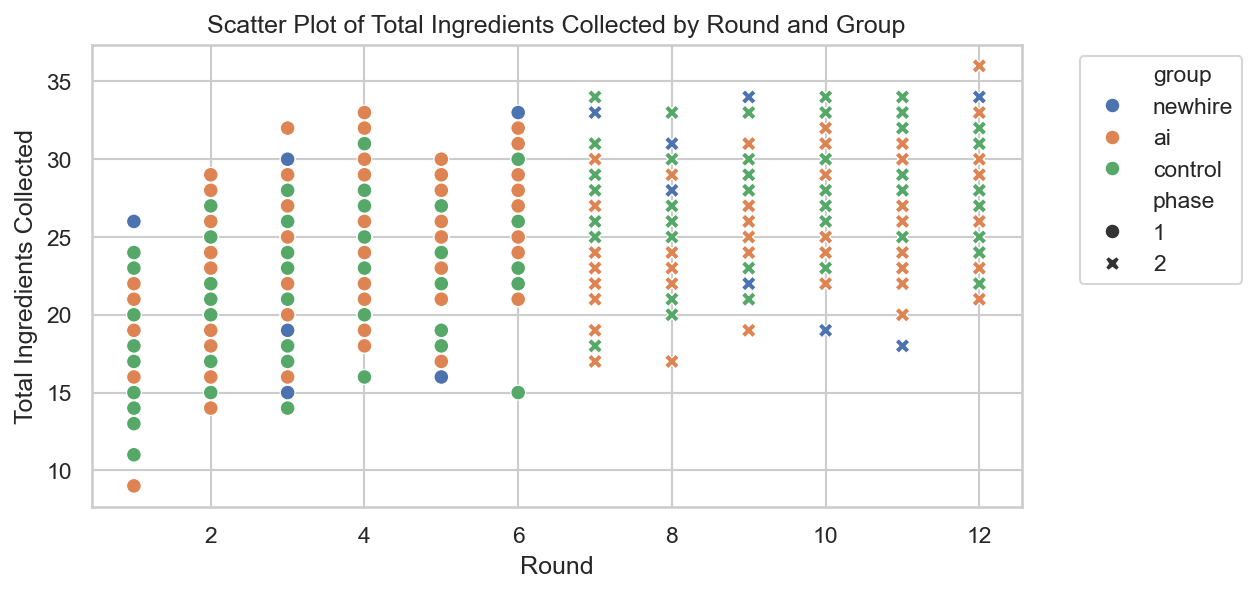

In [10]:
# Creating a scatter plot for the total ingredients collected in each round for each team, colored by group
plt.figure(figsize=(8, 4), dpi=150)  # Initialize a new figure with a specified size (8 inches by 4 inches)

# Creating a scatter plot using Seaborn
sns.scatterplot(data=data, x="round", y="totalingred", hue="group", style="phase", s=50)
# sns.scatterplot creates a scatter plot
# data=data: Specifies the source DataFrame
# x="round": Defines 'round' column as x-axis (each point's horizontal position)
# y="totalingred": Defines 'totalingred' column as y-axis (each point's vertical position)
# hue="group": Distinguishes data points by 'group' column with different colors
# style="phase": Differentiates points by 'phase' column using different markers
# s=50: Sets the size of the markers to 50 for better visibility

# Adding plot title and labels
plt.title("Scatter Plot of Total Ingredients Collected by Round and Group")  # Title of the plot
plt.xlabel("Round")  # Label for the x-axis
plt.ylabel("Total Ingredients Collected")  # Label for the y-axis

# Modifying the legend
plt.legend(title="Group/Phase")  # Adds a legend with the title "Group/Phase"
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# Displaying the plot
plt.show()  # Renders the plot on the screen


In [6]:
# Aggregate the total number of ingredients collected by each team in each phase
phase_totals = data.groupby(['team_id', 'phase'])['totalingred'].sum().unstack()
# data.groupby(['team_id', 'phase']): Groups the data by 'team_id' and 'phase'
# ['totalingred'].sum(): Calculates the sum of 'totalingred' for each group
# unstack(): Reshapes the result, with 'phase' as the columns

# Calculate the difference in performance between phase 2 and phase 1 for each team
phase_difference = phase_totals[2] - phase_totals[1]
# phase_totals[2] - phase_totals[1]: Subtracts the total ingredients collected in phase 1 from phase 2 for each team

# Join the calculated differences with the group information for each team
group_info = data[['team_id', 'group']].drop_duplicates().set_index('team_id')
# data[['team_id', 'group']].drop_duplicates(): Selects 'team_id' and 'group' columns, removing duplicate rows
# set_index('team_id'): Sets 'team_id' as the index of the DataFrame
performance_diff = pd.DataFrame(phase_difference).join(group_info)
# pd.DataFrame(phase_difference): Converts 'phase_difference' Series to a DataFrame
# join(group_info): Joins the DataFrame with 'group_info' on 'team_id'

# Rename columns for clarity
performance_diff.columns = ['performance_difference', 'group']
# Assigns new column names for better understanding

# Display the first few rows of the resulting dataframe
performance_diff.head()
# .head(): Displays the first 5 rows of the DataFrame for a quick preview


,performance_difference,group
team_id,,
21301,33,newhire
21312,43,newhire
21410,-10,newhire
21411,26,newhire
21412,36,newhire


In [7]:
# Normality test (Shapiro-Wilk) for each group
normality_tests = {}  # Initializing an empty dictionary to store the results
for group in performance_diff['group'].unique():
    # Looping through each unique group in the 'group' column
    group_data = performance_diff[performance_diff['group'] == group]['performance_difference']
    # Extracting the performance differences for each group
    normality_tests[group] = shapiro(group_data)
    # Conducting Shapiro-Wilk test for normality on each group's data and storing the result in the dictionary

# Homogeneity of variances test (Levene's test)
levene_test = levene(
    performance_diff[performance_diff['group'] == 'ai']['performance_difference'],
    performance_diff[performance_diff['group'] == 'control']['performance_difference'],
    performance_diff[performance_diff['group'] == 'newhire']['performance_difference']
)
# Conducting Levene's test to assess the homogeneity of variances across the three groups
# It compares the variances in 'performance_difference' between 'ai', 'control', and 'newhire' groups

# Displaying the results of the normality tests and the p-value of the Levene's test
normality_tests, levene_test.pvalue


({'newhire': ShapiroResult(statistic=0.8506529331207275, pvalue=0.017739703878760338),
  'ai': ShapiroResult(statistic=0.9096895456314087, pvalue=0.06287319213151932),
  'control': ShapiroResult(statistic=0.9664808511734009, pvalue=0.6795250177383423)},
 0.04260943786961214)

In [8]:
# Perform Kruskal-Wallis Test
kruskal_result = kruskal(
    performance_diff[performance_diff['group'] == 'ai']['performance_difference'],
    performance_diff[performance_diff['group'] == 'control']['performance_difference'],
    performance_diff[performance_diff['group'] == 'newhire']['performance_difference']
)
# The kruskal function performs the Kruskal-Wallis H-test
# It tests the null hypothesis that the population medians of all groups are equal
# This is done for the 'performance_difference' values for the 'ai', 'control', and 'newhire' groups

# Retrieve and display the p-value of the Kruskal-Wallis Test
kruskal_result.pvalue
# The p-value is extracted from the Kruskal-Wallis test result
# A low p-value (typically < 0.05) would reject the null hypothesis, indicating a significant difference among groups


0.021481438598260728

In [9]:
from itertools import combinations
from scipy import stats
from statsmodels.stats.multitest import multipletests

# Extract unique group names
groups = performance_diff['group'].unique()

# Conduct pairwise Mann-Whitney U tests and store results
pairwise_results = {}
for group1, group2 in combinations(groups, 2):
    u_stat, p_val = stats.mannwhitneyu(
        performance_diff[performance_diff['group'] == group1]['performance_difference'],
        performance_diff[performance_diff['group'] == group2]['performance_difference'],
        alternative='two-sided'
    )
    pairwise_results[(group1, group2)] = p_val

# Adjust for multiple comparisons using Bonferroni correction
p_values = list(pairwise_results.values())
corrected_p_values = multipletests(p_values, method='bonferroni')[1]

# Combine the results with the group names
pairwise_results_corrected = dict(zip(pairwise_results.keys(), corrected_p_values))
pairwise_results_corrected

{('newhire', 'ai'): 0.2392130823664502,
 ('newhire', 'control'): 1.0,
 ('ai', 'control'): 0.01517156182715293}

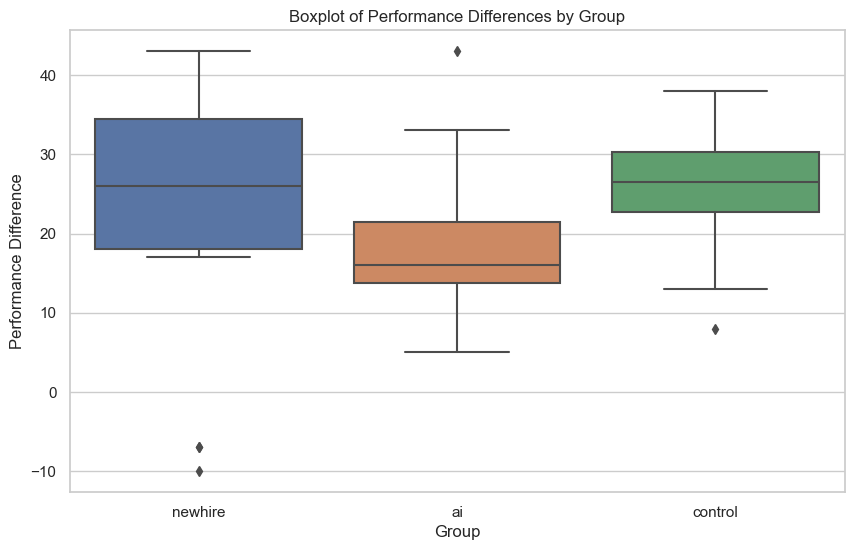

In [10]:
# Create a boxplot of performance differences by group
plt.figure(figsize=(10, 6))
sns.boxplot(x='group', y='performance_difference', data=performance_diff)
plt.title('Boxplot of Performance Differences by Group')
plt.xlabel('Group')
plt.ylabel('Performance Difference')
plt.show()


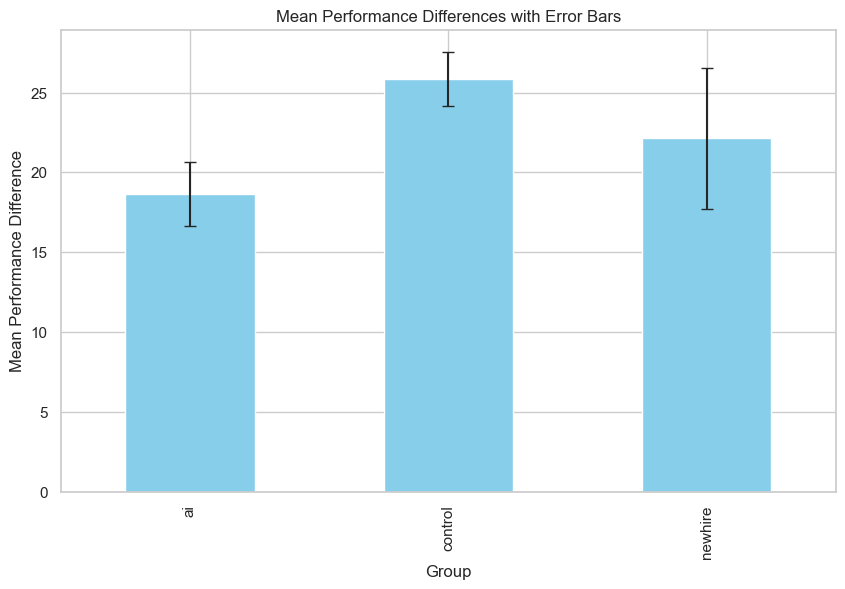

In [11]:
# Mean performance differences with error bars
mean_performance = performance_diff.groupby('group')['performance_difference'].mean()
std_error = performance_diff.groupby('group')['performance_difference'].sem()

# Create a bar chart with error bars
plt.figure(figsize=(10, 6))
mean_performance.plot(kind='bar', yerr=std_error, capsize=4, color='skyblue')
plt.title('Mean Performance Differences with Error Bars')
plt.xlabel('Group')
plt.ylabel('Mean Performance Difference')
plt.show()
